
- **Goal**: introduce normal modes, beats, and energy propagation.
- Consider a one-dimensional chain of $N$ particles each of mass
  $m$ with equal equilibrium separation $a$. 
- Particles are coupled by massless springs with force constant
  $k_c$, except for the two end springs which have spring constant
  $k$.
- Let $u_i$ be the displacement from equilibrium of the $i$th mass
  along the axis of the system.
- The ends of the left- and right-hand springs are assumed fixed.
- Boundary conditions

\begin{equation*}
u_0 = u_{N+1} = 0
\end{equation*}

- The equation of motion for the $i$ th particle is

\begin{align*}
m \frac{ d^2u_i}{dt^2} = -k_c(u_i - u_{i+1}) - k_c(u_i - u_{i-1}) \nonumber \\
 =  -k_c(2 u_i - u_{i+1} - u_{i-1}) \nonumber
\end{align*}

- The equations for particles $i$ = 1 and $N$ next to the walls
  are given by

\begin{align*}
m \frac{ d^2u_1}{dt^2} = -k_c(u_1 - u_{2}) - ku_1 \nonumber \\
m \frac{ d^2u_N}{dt^2}  = -k_c(u_N - u_{N-1} - ku_{N}) \nonumber 
\end{align*}

-  The above equations of motion describe {\em longitudinal}
  oscillations, i.e., motion along the length of the system.

## Exercise 1:  

Study the code below and comment as necessary.  The animation methods do not work in Notebook (but do from the command line).

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class N_chain:

    def __init__(self,N,m,kc,k,omega_0):
        self.N = N
        self.x = np.zeros(N)
        self.v = np.zeros(N)
        self.m = m
        self.kc = kc
        self.k = k
        self.omega_0 = omega_0
        self.xarr = []
        self.varr = []
        self.time = []
        
    def F0(self,x,v,t):
        return np.array([v,-self.kc*(x[1] - x[2]) - self.k*x[1] + (0.5*self.kc)*np.cos(self.omega_0*t)])   
                        #v; -kc(u_i - u_(i+1)) - k*u_(i) + 0.5kc(cos(omega*t))
                            #x(t) = A*cos(omega*t (+ phase))
    
    def FN(self,x,v,t):
        return np.array([v,-self.kc*(x[1] - x[0]) - self.k*x[1]]) #v, -kc(u_i -u_(i-1)) - k(u_i)

    def Fi(self,x,v,t):
        return np.array([v,-self.kc*(2*x[1] - x[2] - x[0])])     #v, -kc(2u_i - u_(i+1) - u_(i-1))

    def rk4_step(self,F,x,v,t):
        k1 = dt*F(x,v,t)         
        k2 = dt*F(x + 0.5*k1[0], v + 0.5*k1[1],t)
        k3 = dt*F(x + 0.5*k2[0], v + 0.5*k2[1],t)
        k4 = dt*F(x + k3[0], v + k3[1],t)
        x[1] = x[1] + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6.
        v = v + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6.
        return x[1],np.array(v)
    
    def rk4_chain(self,tfinal,dt):  
        t = 0.0
        while t < tfinal+dt:
            xn = self.x
            vn = self.v
            self.time.append(t)
            for i in range(len(self.x)):
                self.xarr.append(self.x[i])
                self.varr.append(self.v[i])
            self.x[0],self.v[0] = self.rk4_step(self.F0, np.array([0,xn[0],xn[1]]),vn[0],t)
            self.x[self.N-1],self.v[self.N-1] = self.rk4_step(self.FN,np.array([xn[self.N-2],xn[self.N-1],0]),vn[self.N-1],t)
            if (self.N > 2):
                for i in range(1,self.N-1):
                    self.x[i],self.v[i] = self.rk4_step(self.Fi,np.array([xn[i-1],xn[i],xn[i+1]]),vn[i],t)            
            t = t + dt           
            
    def animate(self,nstep): #only plots for two or three masses        
        lines=[]
        fig, ax = plt.subplots()
        for i in range(0,int(len(self.xarr)/self.N),N*nstep):
            p1 = ax.plot(self.xarr[i]+1, 0., 'bo', \
                         self.xarr[i+1]+2, 0., 'ro', \
                         self.xarr[i+2]+3, 0., 'co', \
                             markersize=10)
            lines.append(p1)
            ax.set_aspect('equal')
            ax.set_ylim(-0.2,0.2)
        ani = animation.ArtistAnimation(fig, lines, interval=10)
        plt.show()

    def animate10(self,nstep): #only plots for 10 masses        
        lines=[]
        fig, ax = plt.subplots()
        for i in range(0,int(len(self.xarr)/self.N),N*nstep):
            p1 = ax.plot(self.xarr[i]+1, 0., 'ro', \
                         self.xarr[i+1]+2, 0., 'ro', \
                         self.xarr[i+2]+3, 0., 'ro', \
                         self.xarr[i+3]+4, 0., 'ro', \
                         self.xarr[i+4]+5, 0., 'ro', \
                         self.xarr[i+5]+6, 0., 'ro', \
                         self.xarr[i+6]+7, 0., 'ro', \
                         self.xarr[i+7]+8, 0., 'ro', \
                         self.xarr[i+8]+9, 0., 'ro', \
                         self.xarr[i+9]+10, 0., 'ro', \
                             markersize=5)
            lines.append(p1)
            ax.set_aspect('equal')
            ax.set_ylim(-0.2,0.2)
        ani = animation.ArtistAnimation(fig, lines, interval=10)
        plt.show()

    def plot_2_masses(self):
        omega_1 = np.sqrt((self.k + 2*self.kc)/self.m)
        omega_2 = np.sqrt(self.k/self.m)
        f1 = np.cos(omega_1*np.array(self.time))  #normal modes, omega_1
        f2 = np.cos(omega_2*np.array(self.time))  #normal modes, omega_2
        fig, axs = plt.subplots(self.N+1,figsize=(10,8))
        for i in range(self.N):
            axs[i].plot(self.time, self.xarr[i::self.N])
            axs[i].set(xlabel='time',ylabel='u'+str(i))
        axs[self.N].plot(self.time, f1, ':', label = '$\omega_1 = \sqrt{(k + 2 k_c)/m}$')
        axs[self.N].plot(self.time, f2, ':', label = '$\omega_2 = \sqrt{k/m}$')
        axs[self.N].plot(self.time, f1+f2, label = '$\omega_1 + \omega_2$')
        axs[self.N].set(xlabel='time', ylabel='u', title = 'normal modes')
        leg = axs[self.N].legend()
        for ax in axs.flat:
            ax.label_outer()
        plt.show()

    def plot_N_masses(self):
        fig, axs = plt.subplots(self.N)
        for i in range(self.N):
            axs[i].plot(self.time, self.xarr[i::self.N])
            axs[i].set(xlabel='time', ylabel='u'+str(i))
        for ax in axs.flat:
            ax.label_outer()
        plt.show()

    def plot_2_energy(self):
        fig, axs = plt.subplots(self.N,figsize=(10,8))
        for i in range(self.N):
            KE = 0.5*self.m*np.array(self.varr[i::self.N])**2 #kinetic energy
            PE = 0.5*self.k*np.array(self.xarr[i::self.N])**2 + 0.5*self.kc*(np.array(self.xarr[0::self.N])-np.array(self.xarr[1::self.N]))**2
            axs[i].plot(self.time, KE, label='KE')
            axs[i].plot(self.time, PE,label='PE')
            axs[i].plot(self.time, (KE+PE),label = 'PE+KE')
            axs[i].set(xlabel='time', ylabel='Energy'+str(i))
            leg = axs[i].legend()
        for ax in axs.flat:
            ax.label_outer()
        plt.show()

## Exercise 2: Motion of two coupled oscillators

Investigate the motion of two masses.  Set the velocities of both particles equal to zero for all runs in this problem.  

1. Choose initial conditions $u_1(0) = 0.5$, $u_2(0) = 0$ and compute the time-dependence of $u_1$ and $u_2$ for a) $k= 1$ and $k_c = 0.8$ and b) $k= 1$ and $k_c = 1$.  Determine reasonable values for the time step $\Delta t$ and the time of the run, $tmax$.  (Set the mass of the particles to unity.)  Is it possible to define a period of motion in the first case?  What is the period of motion in the second case?

2. Set $k= 1$ and $k_c = 0.2$.  This is a case of *weak coupling*.  Can you identify two kinds of oscillations superimposed upon each other?  

3. Choose initial conditions $u_1(0) = 0.5$, $u_2(0) = 0.5$ so that both particles have equal displacements. Set $k= 1$ and $k_c = 0.1$. Describe the observed motion.  Compute the energy (kinetic plus potential) of each particle.  Does the period of motion depend on $k_c$?  What is the dependence of motion on $k$?

4. Consider initial conditions $u_1(0) = 0.5$, $u_2(0) = -0.5$ so that both particles have equal but *opposite* displacements.  Determine the dependence of $\omega^2$ on $k$ and $k_c$.

5. Discuss your results in terms of *normal modes*.

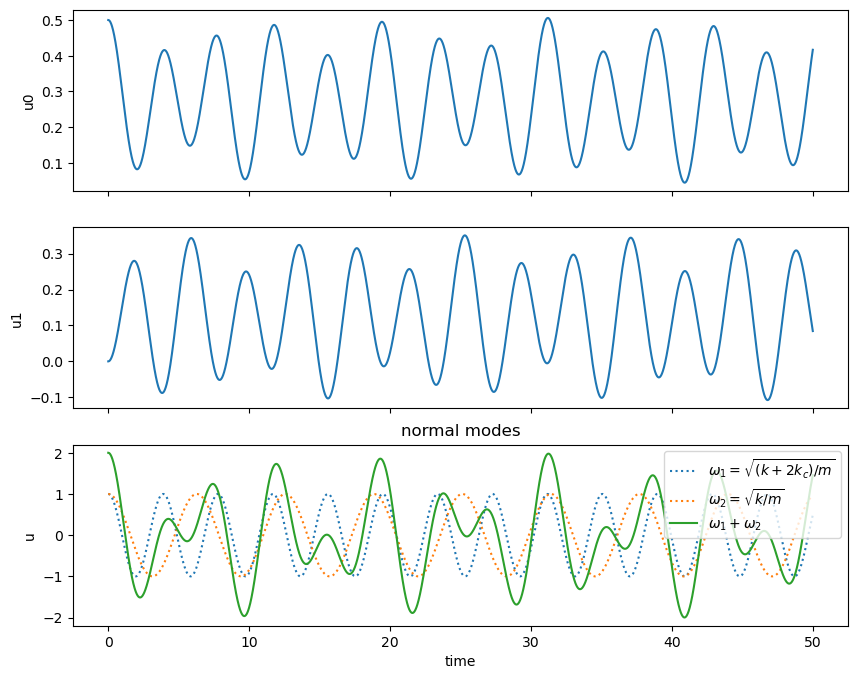

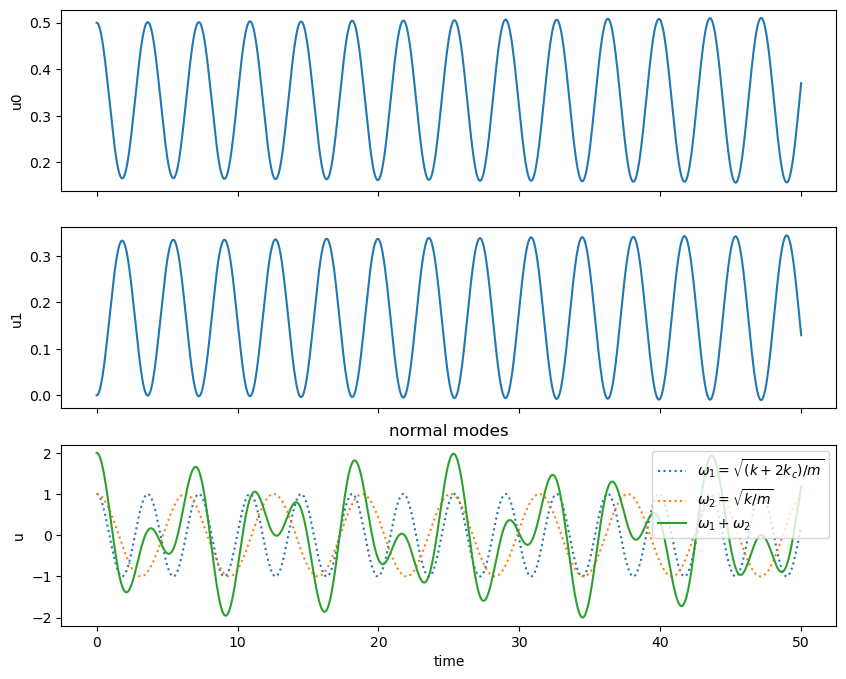

In [29]:
#part 1

N = 2
m = 1
k = 1.0
omega_0 = 0.0*np.sqrt(k/m)
tfinal = 50
dt = 0.005

kc = 0.8
k = 1.0
co = N_chain(N,m,kc,k,omega_0)
co.x[0] = 0.5
co.rk4_chain(tfinal,dt)
co.plot_2_masses()

kc = 1.0
k = 1.0
co = N_chain(N,m,kc,k,omega_0)
co.x[0]=0.5
co.rk4_chain(tfinal,dt)
co.plot_2_masses()

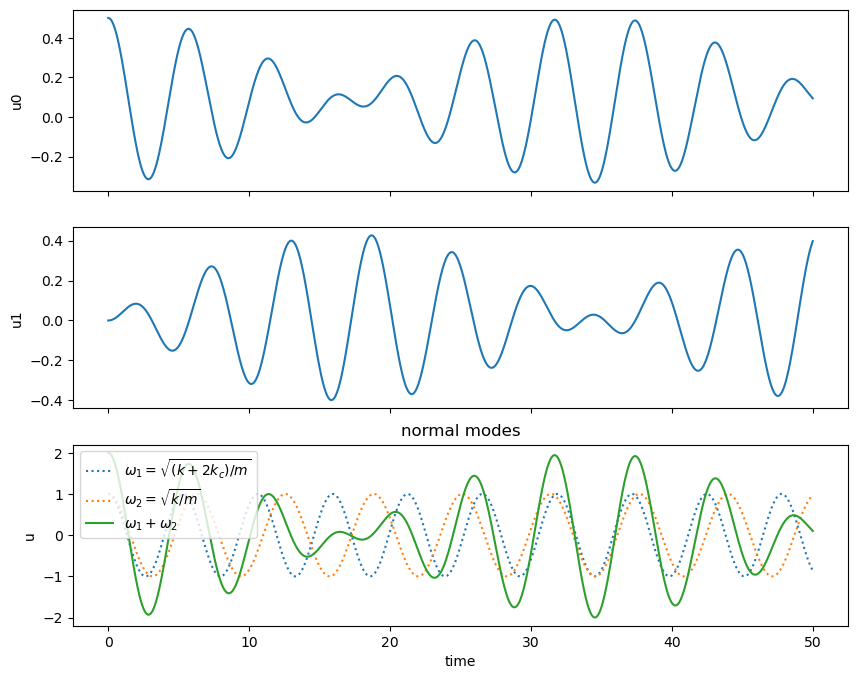

In [30]:
#part 2

kc = 0.2
k = 1.0
co = N_chain(N,m,kc,k,omega_0)
co.x[0]=0.5
co.rk4_chain(tfinal,dt)
co.plot_2_masses()

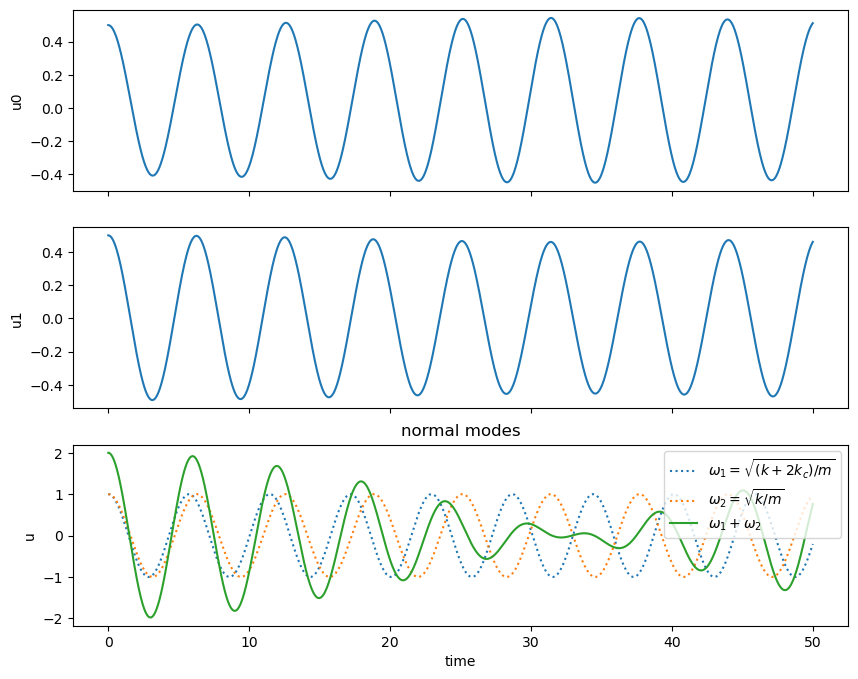

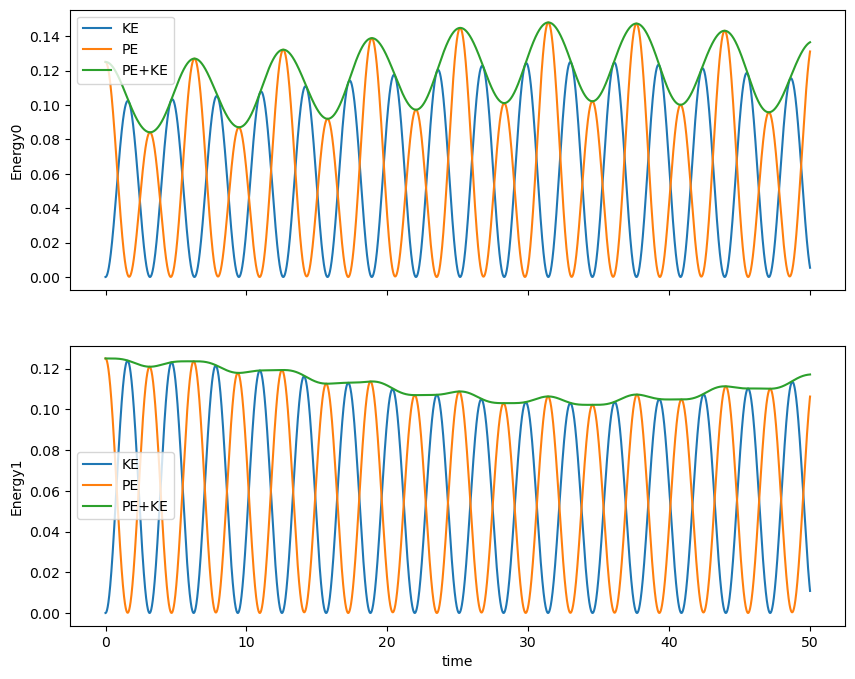

In [31]:
#part 3

kc = 0.1
k = 1.0

co = N_chain(N,m,kc,k,omega_0)
co.x[0]=0.5
co.x[1]=0.5
co.rk4_chain(tfinal,dt)
co.plot_2_masses()

co.plot_2_energy()

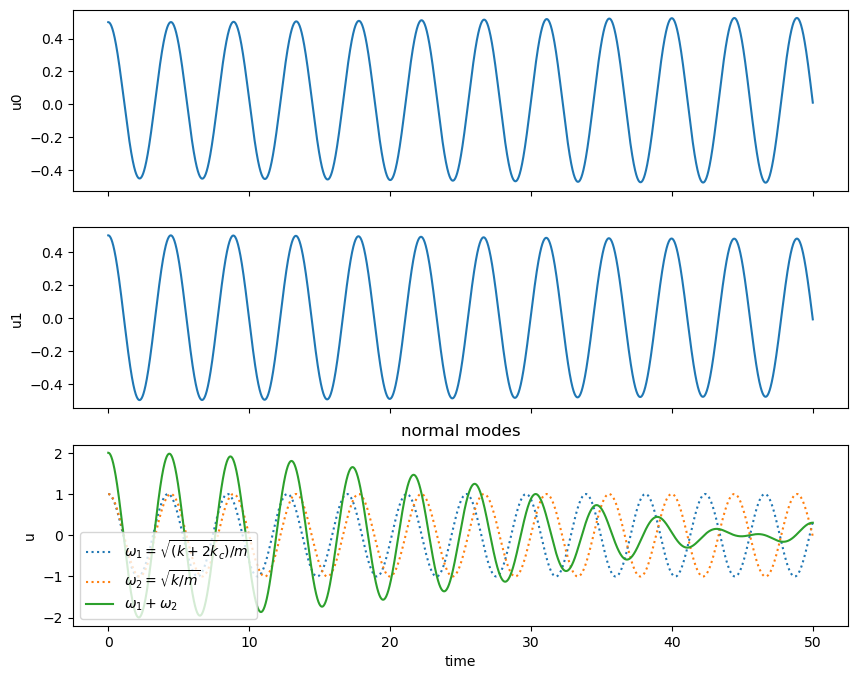

In [32]:
# part 3 (stiffer spring)

kc = 0.1
k = 2.0

co = N_chain(N,m,kc,k,omega_0)
co.x[0]=0.5
co.x[1]=0.5
co.rk4_chain(tfinal,dt)
co.plot_2_masses()

#co.plot_2_energy()

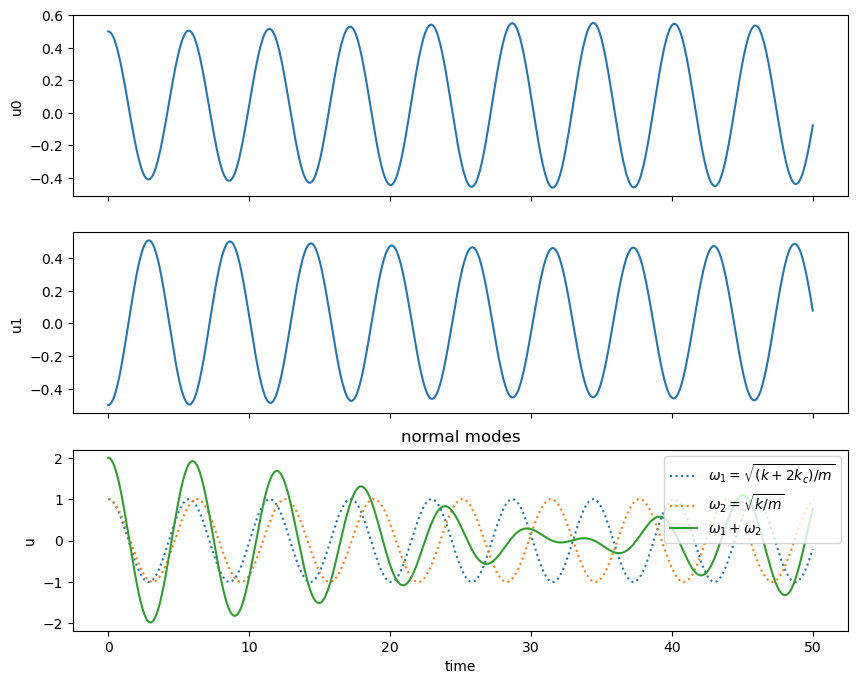

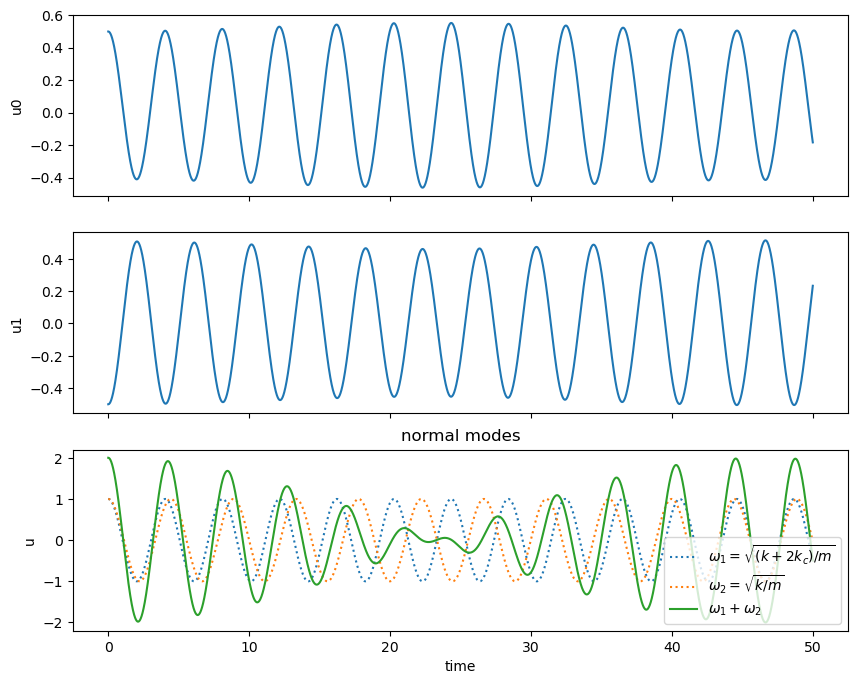

In [33]:
# Part 4

kc = 0.1
k = 1.0

co = N_chain(N,m,kc,k,omega_0)
co.x[0]=0.5
co.x[1]=-0.5
co.rk4_chain(tfinal,dt)
co.plot_2_masses()

kc = 0.2
k = 2.0

co = N_chain(N,m,kc,k,omega_0)
co.x[0]=0.5
co.x[1]=-0.5
co.rk4_chain(tfinal,dt)
co.plot_2_masses()

## Exercise 3:

1. Run the program with $N= 3$, $k_c = 0.2$, $k = 1$ and arbitrary but non-zero initial displacements. Describe the time-dependence of the displacements of the particles.

2. Now consider the following three cases and discuss the results in the context of *normal modes*:

| | $u_0(1)$ | $u_0(2)$ | $u_0(3)$ |
|-------------:|--------------:|-------------:|-----------:|
|case 1 | 0.5 | 0.5 | 0.5 |
|case 2 | 0.5 | -0.5 | 0.5 |
|case 3 | 0.5 | 0 | -0.5|

What are the normal mode frequencies?

3. Add an external driving force to particle 1 and determine the normal mode frequencies.  Compare with the results from part 2.

4.  Repeat part 3, but with $N=10$ and $k = k_c = 1$. Try values of $\omega$ in the range $0.2\sqrt{k/m}$ to $3 \sqrt{k/m}$ to find at least one resonance.  Verify a few cases with the following analytical result for the normal frequencies

\begin{equation*}
\omega_n^2 = \frac{4 k}{m} \sin^2\frac{n \pi}{2(N+1)}.
\end{equation*}

5.  Perturb the chain at one end (e.g., $u_1(0) = 1$) and determine the time it takes to for a disturbance to travel a given distance.  This illustrates the propagation of energy.  Estimate $v$.  Consider larger values of $N$ to ensure that your estimate is independent of $N$.

2. Now consider the following three cases and discuss the results in the context of *normal modes*:

| | $u_0(1)$ | $u_0(2)$ | $u_0(3)$ |
|-------------:|--------------:|-------------:|-----------:|
|case 1 | &nbsp; &nbsp;&nbsp; &nbsp;0.5 | &nbsp; &nbsp;&nbsp; &nbsp;0.5 | &nbsp; &nbsp;&nbsp; &nbsp;0.5 |
|case 2 | 0.5 | -0.5 | 0.5 |
|case 3 | 0.5 | 0 | -0.5|

What are the normal mode frequencies?

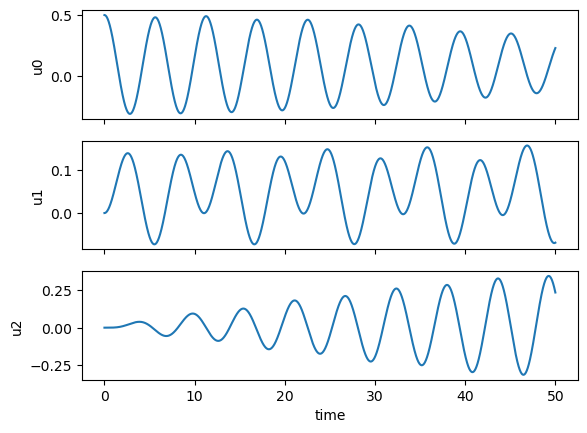

In [34]:
#Part 1

N = 3
kc = 0.2
k = 1.0

co = N_chain(N,m,kc,k,omega_0)
co.x[0]=0.5
co.rk4_chain(tfinal,dt)
co.plot_N_masses()

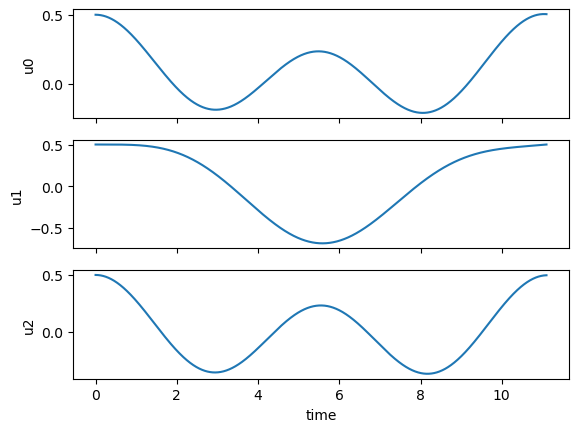

In [35]:
#Part 2, Case 1

N = 3
kc = 0.2
k = 1.0
tfinal = 11.1  #estimate time for 2 T

co = N_chain(N,m,kc,k,omega_0)
co.x[0]=0.5
co.x[1]=0.5
co.x[2]=0.5
co.rk4_chain(tfinal,dt)
co.plot_N_masses()

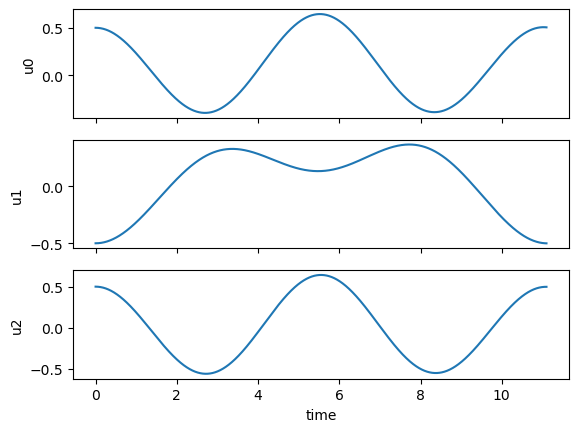

In [36]:
#Part 2, Case 2

N = 3
kc = 0.2
k = 1.0
tfinal = 11.1  #estimate time for 2 T

co = N_chain(N,m,kc,k,omega_0)
co.x[0]=0.5
co.x[1]=-0.5
co.x[2]=0.5
co.rk4_chain(tfinal,dt)
co.plot_N_masses()

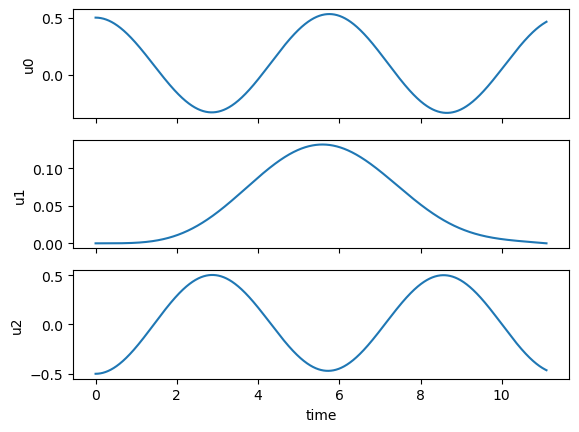

In [37]:
#Part 2, Case 3

N = 3
kc = 0.2
k = 1.0
tfinal = 11.1  #estimate time for 2 T

co = N_chain(N,m,kc,k,omega_0)
co.x[0]=0.5
co.x[1]=0.0
co.x[2]=-0.5
co.rk4_chain(tfinal,dt)
co.plot_N_masses()

Text(0, 0.5, 'Amplitude')

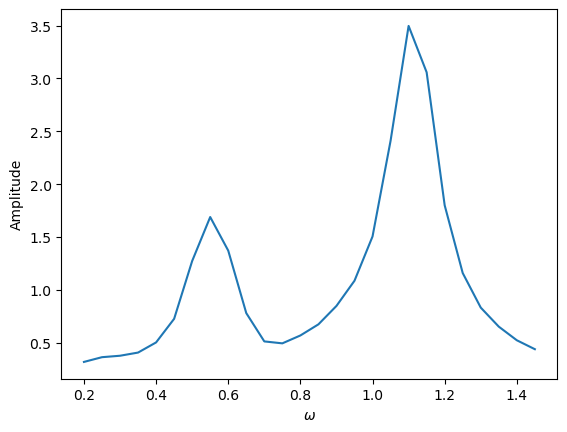

In [38]:
#Part 3, add driving frequency to mass 1

N = 3
kc = 0.2
k = 1.0
m = 1.0
tfinal = 50
dt = 0.005

amp = []
omega0 = np.arange(0.2,1.5,0.05)*np.sqrt(k/m)

for i in range(len(omega0)):
    co = N_chain(N,m,kc,k,omega0[i])
    co.rk4_chain(tfinal,dt)
    amp.append(abs(np.max(co.xarr) - np.min(co.xarr)))

plt.plot(omega0,amp)
plt.xlabel('$\omega$')
plt.ylabel('Amplitude')

[0.28462968 0.56346511 0.83083003 1.08128163 1.30972147 1.51149915
 1.68250707 1.81926399]


Text(0, 0.5, 'Amplitude')

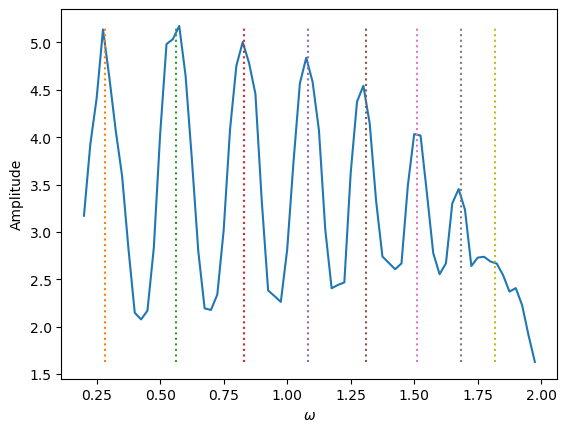

In [40]:
# Part 4, 10 masses

N = 10
kc = 1.0
k = 1.0 
m = 1.0
tfinal = 50
dt = 0.02

amp = []
omega0 = np.arange(0.2,2.0,0.025)*np.sqrt(k/m)

n = np.linspace(1,8,8)
omegaN = np.sqrt((4*k/m)*np.sin(n*np.pi/(2*(N+1)))**2)
print(omegaN)

for i in range(len(omega0)):
    #print(i)
    co = N_chain(N,m,kc,k,omega0[i])
    co.rk4_chain(tfinal,dt)
    amp.append(abs(np.max(co.xarr) - np.min(co.xarr)))

plt.plot(omega0,amp)
for i in range(8):
    plt.plot([omegaN[i],omegaN[i]],[np.min(amp),np.max(amp)],':')

plt.xlabel('$\omega$')
plt.ylabel('Amplitude')

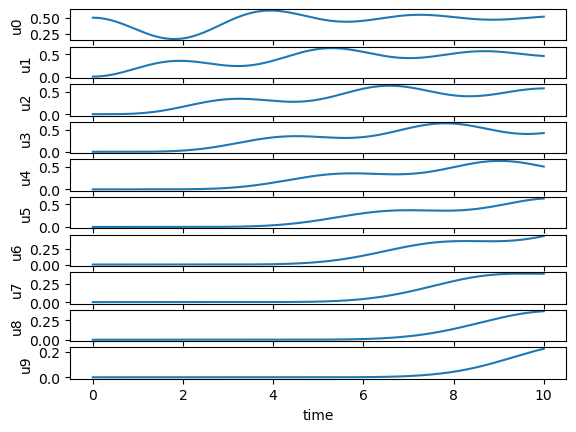

In [41]:
#Part 5, wave propagation

N = 10
kc = 1.0
k = 1.0
m = 1.0
tfinal = 10
dt = 0.005
omega_0 = 0.0

co = N_chain(N,m,kc,k,omega_0)
co.x[0]=0.5
co.rk4_chain(tfinal,dt)
co.plot_N_masses()